# K nearest neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis and Visualization

In [2]:
first_team = np.array([4.3,2.5,5.7,6.1,7.4,3.4,3.1,6.3,5.5,7.7,6.6,6.6,5.4,5.2,8.3,4.2,3,4.9,8.5,7.2,6.6,6.3,3.3,5.4,3.4,9.3,7.8,2.4,6.4,2.5,3.6,4.6,3.3,9.7,5,5.7,6.8,5.9,5,2.5,6.2,6.7,6.1,4.6,5.4,4.8,7.8,7.2,8.3,5,3.5,6.1,6.9,6.5,6.2,9.3,2.7,3.9,8.4,3.7,5,3.9,4.1,6.2,7.1,2.6,3.3,1.8,4.1,6.3])
second_team = np.array([3.9,6.3,3.9,6.2,3.4,7.5,6.8,4.9,8.6,3.5,2.9,4.5,7.2,5.7,5.4,9.3,7.7,6.8,5.6,4.2,3.7,7.7,7.5,2.9,5.3,6.4,3.5,5.6,6.4,5,6.9,5.4,6.5,4.8,5.3,7.2,3.2,7.2,5.3,4.8,6.5,6.1,7.7,7.3,5.1,6.5,2.3,3.9,4.1,4.6,7.8,2.5,6,2.5,6.8,6.6,6.2,7.7,3.4,8.6,8.4,8.8,7.1,5.1,4.7,6.3,6.2,5,4,7.7])
scoring_player = np.array([1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0])

#df = pd.read_csv('gene_expression.csv')
df = pd.DataFrame({'first_team': first_team, 'second_team': second_team, 'scoring_player': scoring_player})
df.head()

,first_team,second_team,scoring_player
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='first_team', ylabel='second_team'>

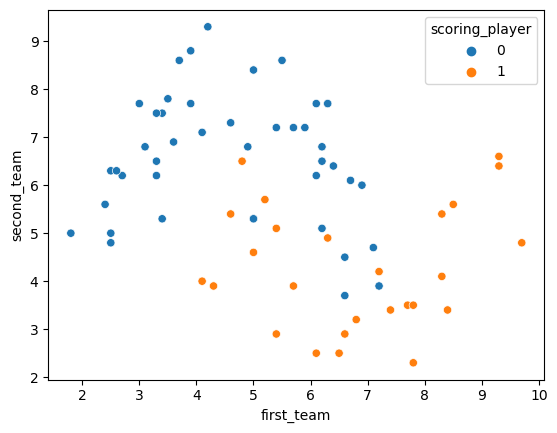

In [3]:
sns.scatterplot(data=df, x='first_team', y='second_team', hue='scoring_player')

## Train and Test Data Splits 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('scoring_player', axis=1)
y = df['scoring_player']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling Data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## K Neighbor

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Choosing K Value

In [12]:
full_test = pd.concat([X_test, y_test], axis=1)

In [13]:
len(full_test)

21

<Axes: xlabel='first_team', ylabel='second_team'>

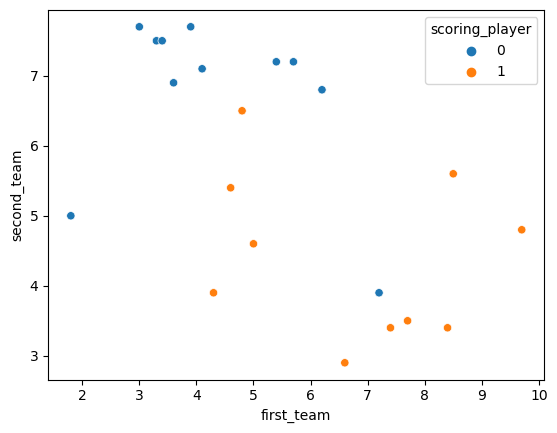

In [14]:
sns.scatterplot(data=full_test, x='first_team', y='second_team', hue='scoring_player')

## Model Evaluation

In [15]:
y_pred = knn_model.predict(scaled_X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
accuracy_score(y_test, y_pred)

0.8571428571428571

In [18]:
confusion_matrix(y_test, y_pred)

array([[10,  1],
       [ 2,  8]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.89      0.80      0.84        10

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



## Methods for choosing K value

### Elbow method

In [20]:
test_error_rates = []

for k in range(1, 15):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

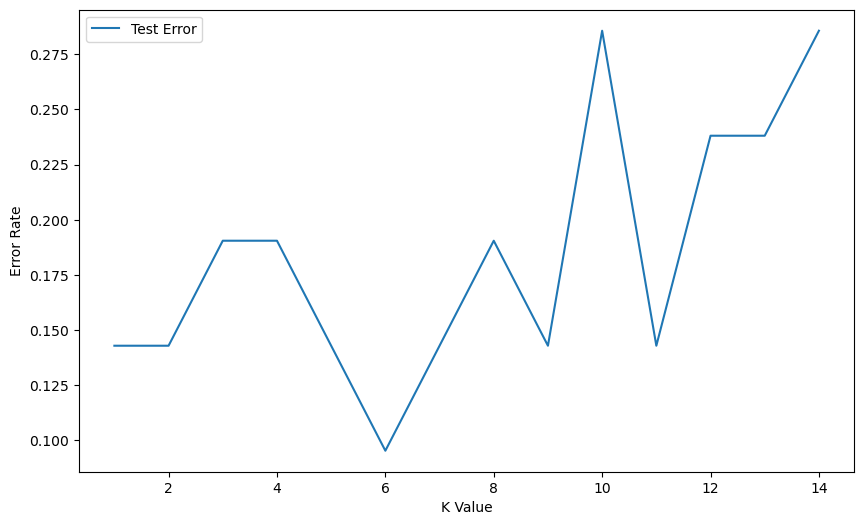

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15),test_error_rates, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### Full Cross Validation Grid Search method

In [22]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [23]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [24]:
operations = [('scaler', scaler), ('knn', knn)]

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
pipe = Pipeline(operations)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
k_values = list(range(1, 20))

In [29]:
param_grid = {'knn__n_neighbors': k_values}

In [30]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [31]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [32]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [33]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.77777778, 0.79555556, 0.83777778, 0.81777778, 0.85777778,
       0.79777778, 0.83777778, 0.83777778, 0.83777778, 0.81777778,
       0.81777778, 0.79555556, 0.79555556, 0.83555556, 0.83777778,
       0.83777778, 0.83777778, 0.81777778, 0.81777778])

Text(0, 0.5, 'Accuracy')

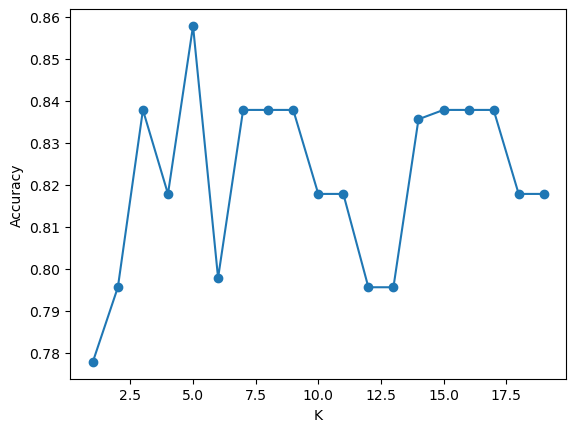

In [34]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values, scores, 'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

## Final model evaluation

In [35]:
full_pred = full_cv_classifier.predict(X_test)
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.89      0.80      0.84        10

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21

